Классификатор Антиробота должен отличать роботов от людей. Руслан и Людмила написали классификаторы для потока, про который известно, что роботов там ровно половина. Классификатор Руслана опознаёт 80% роботов из всех роботов, но находит (ошибочно) 40% роботов среди всех людей. Классификатор Людмилы опознаёт 60% роботов из всех роботов, но считает роботами 20% людей.
Если предположить, что они написали один и тот же классификатор, определяющий «роботность» посещения в пределах от 0 до 1, но выбрали различный порог срабатывания, какая у этого классификатора может быть максимальная f-мера?

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
robot_percentage = 0.5

In [170]:
# Ruslan
tp = robot_percentage * 0.8
fn = robot_percentage * (1 - 0.8)
fp = (1 - robot_percentage) * 0.4
tn = (1 - robot_percentage) * (1 - 0.4)
tp, fn, fp, tn

(0.4, 0.09999999999999998, 0.2, 0.3)

In [171]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
precision, recall

(0.6666666666666666, 0.8)

In [173]:
f_score = 2 / (1 / precision + 1 / recall)
f_score

0.7272727272727273

In [157]:
n = 100

In [158]:
predict = np.random.uniform(size=n)
predict

array([0.93274479, 0.50603692, 0.43095939, 0.6942442 , 0.33345535,
       0.2937246 , 0.51779281, 0.46335854, 0.72664654, 0.2505891 ,
       0.95694542, 0.39763406, 0.70498798, 0.81108383, 0.36639028,
       0.29983642, 0.09630872, 0.8487085 , 0.20247304, 0.7780492 ,
       0.34719737, 0.96818488, 0.22144116, 0.98438626, 0.8526477 ,
       0.82150511, 0.52922236, 0.5476364 , 0.23178309, 0.15116628,
       0.76696513, 0.98866806, 0.12829189, 0.20689054, 0.66209413,
       0.81532049, 0.09864615, 0.20157655, 0.83190352, 0.17423286,
       0.80688028, 0.11904568, 0.32954317, 0.77404227, 0.26878137,
       0.93049397, 0.49598054, 0.76727238, 0.20757118, 0.40631663,
       0.63653611, 0.07857372, 0.74487225, 0.72208841, 0.66805371,
       0.64651517, 0.39820453, 0.50349311, 0.37070723, 0.67045483,
       0.22391195, 0.68095025, 0.65561275, 0.14829515, 0.36791908,
       0.81339679, 0.39314236, 0.48898971, 0.05106715, 0.66899305,
       0.97924091, 0.37873277, 0.32526748, 0.39998897, 0.09202

In [159]:
fact = np.array((n - int(robot_percentage * n)) * [-1] + int(robot_percentage * n) * [1])
fact

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [160]:
def foo(fact, predict, threshold):
    n = np.size(predict)
    true_positive = ((fact == 1) & (predict >= threshold)).sum() / n
    false_negative = ((fact == 1) & (predict < threshold)).sum() / n
    true_negative = ((fact == -1) & (predict < threshold)).sum() / n
    false_positive = ((fact == -1) & (predict >= threshold)).sum() / n
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    
    f_score = 2.0 / (1.0 / precision + 1.0 / recall)

    return {"true_positive" : true_positive, 
            "false_negative" : false_negative, 
            "true_negative" : true_negative, 
            "false_positive" : false_positive, 
            "precision" : precision, 
            "recall" : recall, 
            "f_score" : f_score}


In [165]:
thresholds = np.linspace(0, 1, endpoint=True, num=10000)
f_scores = np.zeros_like(thresholds)

for i, threshold in enumerate(thresholds):
    res = foo(fact, predict, threshold)
    f_scores[i] = res["f_score"]

C:\Users\egora\AppData\Local\Temp\ipykernel_54020\1590157849.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)
C:\Users\egora\AppData\Local\Temp\ipykernel_54020\1590157849.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  f_score = 2.0 / (1.0 / precision + 1.0 / recall)


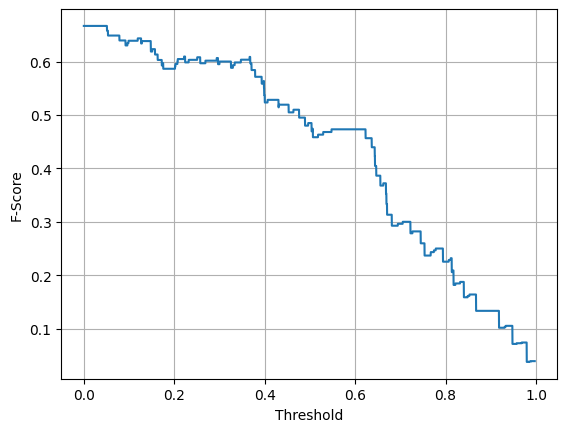

In [166]:
plt.plot(thresholds, f_scores)
plt.xlabel("Threshold")
plt.ylabel("F-Score")
plt.grid()
plt.show()